In [1]:
from ansys.dpf import core as dpf

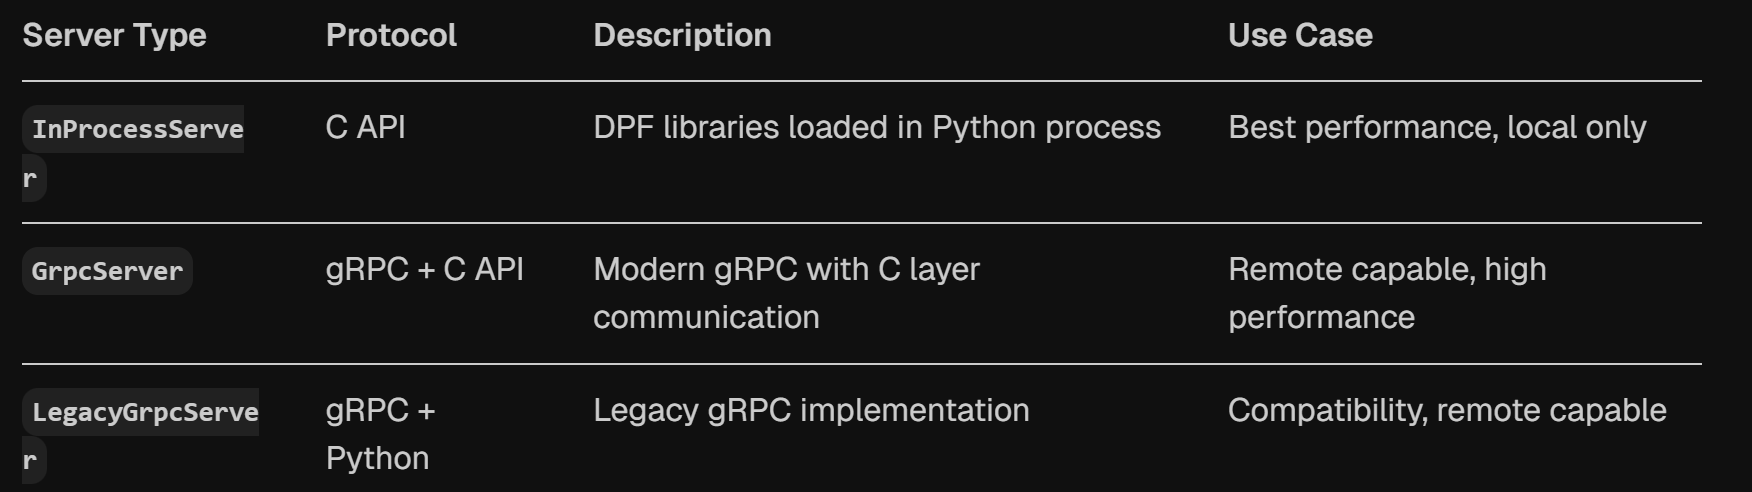

# There are mainly two ways for installing DPF server

1. Ansys Workbench: Shipped with Ansys Installation
2. Standalone: Seperate portable version

# Exercise: Let us list all available server in the system

dpf.server.available_servers()

In [2]:
dpf.server.available_servers()

# Question: What is this function returning?

{'2023.2': functools.partial(<function start_local_server at 0x000002802A939F30>, ansys_path='C:\\Program Files\\ANSYS Inc\\v232'),
 '2024.1': functools.partial(<function start_local_server at 0x000002802A939F30>, ansys_path='C:\\Program Files\\ANSYS Inc\\v241'),
 '2024.2': functools.partial(<function start_local_server at 0x000002802A939F30>, ansys_path='C:\\Program Files\\ANSYS Inc\\v242'),
 '2025.1': functools.partial(<function start_local_server at 0x000002802A939F30>, ansys_path='C:\\Program Files\\ANSYS Inc\\v251'),
 '2025.2': functools.partial(<function start_local_server at 0x000002802A939F30>, ansys_path='C:\\Program Files\\ANSYS Inc\\v252'),
 '2026.1': functools.partial(<function start_local_server at 0x000002802A939F30>, ansys_path='C:\\Program Files\\ANSYS Inc\\v261')}

### You can start your own server, you can start as many as you want, but there can be only ONE global server

dpf.start_location_server()

In [3]:
#help(dpf.start_local_server)

dpf.start_local_server(as_global=True, config=dpf.AvailableServerConfigs.InProcessServer) # InProcessServer

### Exercise: Lets Start a GRPC server and observer the difference

In [4]:
grpc_server = dpf.start_local_server(config=dpf.AvailableServerConfigs.GrpcServer)
print(grpc_server)

DPF Server: {'server_ip': '127.0.0.1', 'server_port': 50054, 'server_process_id': 126800, 'server_version': '11.0', 'os': 'nt', 'path': 'C:\\Program Files\\ANSYS Inc\\v261'}


### Exercise: Lets us use DPF server from any other Ansys Installation

In [5]:
import os
ansys_251_path = os.environ["AWP_ROOT251"]

In [6]:
print(dpf.start_local_server(ansys_path=ansys_251_path))

DPF Server: {'server_ip': '', 'server_port': None, 'server_process_id': 28016, 'server_version': '11.0', 'os': 'nt', 'path': 'C:\\Program Files\\ANSYS Inc\\v251'}


### Lets stop all the running dpf server

In [7]:
dpf.server.shutdown_all_session_servers()

## Practice Exercises

### Exercise 1: Server Connection Information
After connecting to a DPF server (using `dpf.connect_to_server()` or starting a model):
1. Print the server's IP address
2. Print the server's port number
3. Check if the server is running on InProcess mode
4. Print the DPF version

In [8]:
# Your code for Exercise 1 here

### Exercise 2: Working with Multiple Servers
1. Start a new server using `dpf.start_local_server()`
2. Get information about all running servers using `dpf.server.get_or_create_server()`
3. Create a simple model using the example file
4. Verify which server the model is using

In [9]:
# Your code for Exercise 2 here

---

## Solutions (Try the exercises first!)

### Solution 1: Server Connection Information

In [11]:
# Solution 1: Server Connection Information
from ansys.dpf.core import examples

# Connect to server (or get existing server)
server = dpf.server.get_or_create_server(None)

print("Server Information:")
# print(f"  IP Address: {server.ip}")
# print(f"  Port: {server.port}")
print(f"  InProcess Mode: {server.info.get('inprocess', False)}")
print(f"  DPF Version: {server.version}")

Server Information:
  InProcess Mode: False
  DPF Version: 11.0


### Solution 2: Working with Multiple Servers

In [12]:
# Solution 2: Working with Multiple Servers

# Start a local server
my_server = dpf.start_local_server(as_global=False, config=dpf.AvailableServerConfigs.GrpcServer)

print("New Server Started:")
print(f"  Server IP: {my_server.ip}")
print(f"  Server Port: {my_server.port}")
print()

# Load a model using example file
model = dpf.Model(examples.download_transient_result(), server=my_server)

print("Model Information:")
print(f"  Model loaded on server: {model._server.ip}:{model._server.port}")
print(f"  Number of results: {len(model.metadata.time_freq_support.time_frequencies)}")

# Cleanup: shutdown the server when done
# my_server.shutdown()

New Server Started:
  Server IP: 127.0.0.1
  Server Port: 50055

Model Information:
  Model loaded on server: 127.0.0.1:50055
  Number of results: 35
